In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline


















### How to find the best value for the max depth?








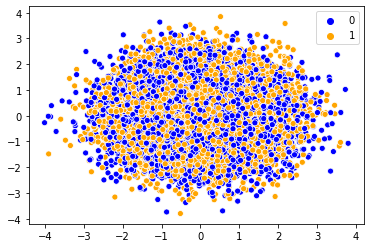

In [2]:
# creating a sophisticated classification dataset with 15 features and a 

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20000, n_features=15, n_informative=5, n_redundant=1, n_repeated=0, n_classes=2, n_clusters_per_class=5, random_state=1)

sns.scatterplot(x= X[:,1], y= X[:,14], hue=y, palette=["blue", "orange"]);


In [3]:
# the data
pd.concat([pd.DataFrame(X), pd.DataFrame({"label": y})], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,label
0,0.201407,-0.944198,-0.677044,1.214451,-2.121573,0.156308,-0.666815,-2.268110,0.509605,0.365841,-0.062921,0.939774,-2.043912,-1.525881,-0.875456,1
1,-0.659186,-0.196834,0.574344,-2.949024,3.344745,-0.255948,-1.203752,1.021205,0.067350,0.872508,-1.517960,2.417119,2.457923,-2.681621,-1.531589,0
2,1.305495,-0.099105,-0.328637,0.771747,0.915151,-2.856812,0.725662,0.114759,-0.139080,-0.709372,0.360700,0.762959,0.039477,-0.044634,-0.545964,0
3,-0.816756,-0.186734,0.666139,-0.845442,2.015049,0.851484,1.458602,0.458460,0.486929,1.002369,-1.466910,0.885426,0.739072,1.862986,0.150089,1
4,2.042118,-0.541331,-0.741518,-0.497324,-0.356044,-0.474204,-1.653221,0.325547,0.328632,0.105608,-0.092062,0.695181,1.327217,-0.787175,-1.312739,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-2.661977,2.173993,-0.512370,1.345840,1.569515,-0.034132,0.192468,-0.502966,0.374403,-1.209413,-0.899855,3.776818,-2.175527,2.919201,2.115517,1
19996,0.754213,-0.949325,1.639739,0.840190,-1.677094,2.702978,-0.031919,-0.031023,-0.568049,1.427669,0.347222,1.647315,-1.418668,2.131605,-1.612309,0
19997,-1.603963,0.328210,0.456958,-0.537677,-0.980242,2.420069,-0.056448,1.046264,1.936006,-0.221944,-1.431044,-1.753718,-0.348943,-0.233533,-0.970148,1
19998,-0.472763,-0.287459,0.057064,1.399431,-1.336541,3.134516,0.592172,-0.678298,-1.021832,-0.159331,0.123367,-2.986950,-4.135738,1.157009,0.802018,1


In [4]:

from sklearn.tree import DecisionTreeClassifier

# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.9, random_state = 1)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, train_size= 0.8, random_state = 0)

accs = []
accs_train = []
for max_depth in range(1,50):
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf_tree.fit(X_train, y_train)
    accs.append(clf_tree.score(X_validation, y_validation))
    accs_train.append(clf_tree.score(X_train, y_train))



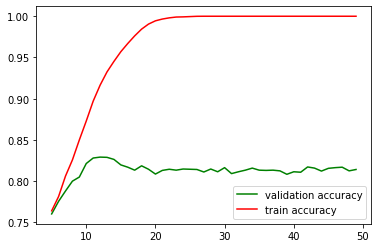

In [5]:
sns.lineplot(x= range(5,len(accs)+1), y=accs[4:], color= "green", label = "validation accuracy")
sns.lineplot(x= range(5,len(accs_train)+1), y=accs_train[4:], color= "red", label = "train accuracy");

In [6]:
best_max_depth = np.argmax(accs)+1
print("best max depth")
print(best_max_depth)

best max depth
12


In [7]:

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=11)
clf_tree.fit(X_train, y_train)
clf_tree.score(X_test, y_test)


0.8235

In [8]:
# validation score is an optimistic estimate:
clf_tree.score(X_validation, y_validation)


0.83